# Medical Examiner Case Archives

Cook County (Chicago) medical examiner records, taken from [here](https://datacatalog.cookcountyil.gov/Public-Safety/Medical-Examiner-Case-Archive/cjeq-bs86) after discovery via [Data is Plural](https://tinyletter.com/data-is-plural).

## Do your importing/setup

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 200)

/Users/khanfazil/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the data, check its row count and column types

In [2]:
df = pd.read_csv("case-archive-encoded.csv", na_values = ["-1"])

In [3]:
df.columns

Index(['Case Number', 'Date of Incident', 'Date of Death', 'Age', 'Gender',
       'Race', 'Latino', 'Manner of Death', 'Primary Cause',
       'Primary Cause Line B', 'Primary Cause Line C', 'Secondary Cause',
       'Gun Related', 'Opioid Related', 'Incident Address', 'Incident City',
       'longitude', 'latitude', 'OBJECTID', 'location'],
      dtype='object')

In [4]:
df.head()

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
0,ME2017-04255,09/10/2017 08:28:00 PM,09/10/2017 08:51:00 PM,51.0,1.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20468,NaN
1,ME2018-02149,05/05/2018 06:30:00 AM,05/05/2018 06:41:00 AM,65.0,1.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110 W. 21ST PL #1,CHICAGO,-87.678845,41.853279,77827,"(41.8532787, -87.6788449)"
2,ME2018-02154,04/26/2018 08:29:00 AM,05/05/2018 04:45:00 AM,95.0,1.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20704 S Woodlawn Ct,FRANKFORT,NaN,NaN,77839,NaN
3,ME2018-02156,05/05/2018 12:00:00 PM,05/05/2018 12:25:00 PM,64.0,0.0,5.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4008 W. BERTEAU AVENUE, APT #1",CHICAGO,-87.728177,41.957468,77823,"(41.9574677, -87.7281769)"
4,ME2018-02158,05/05/2018 09:30:00 AM,05/05/2018 09:50:00 AM,61.0,1.0,2.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3947 W. LEXINGTON STREET,CHICAGO,-87.724739,41.871451,77822,"(41.8714515, -87.7247386)"


In [5]:
df.shape

(22634, 20)

## Cleaning up your data

First you'll want to convert the `Race` and `Gender` columns from codes into actual text to make analysis easier.

### Gender codes

* `-1` - `Data missing`
* `0` - `Female`
* `1` - `Male`
* `2` - `Unknown`

### Race codes

* `-1` - `Data missing`
* `0` - `American Indian`
* `1` - `Asian`
* `2` - `Black`
* `3` - `Other`
* `4` - `Unknown`
* `5` - `White`

In [6]:
df.Race.value_counts()

5.0    12490
2.0     9366
1.0      342
3.0      269
4.0       28
0.0       15
Name: Race, dtype: int64

In [7]:
df.Race = df.Race.replace({
    -1: np.nan,
    0: 'American Indian',
    1: 'Asian',
    2: 'Black',
    3: 'Other',
    4: np.nan,
    5: 'White'
})

In [8]:
df.Gender.value_counts()

1.0    16158
0.0     6363
2.0       12
Name: Gender, dtype: int64

In [9]:
df.Gender = df.Gender.replace({
    -1: np.nan,
    0: 'Female',
    1: 'Male',
    2: np.nan
})

In [10]:
df.head()

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
0,ME2017-04255,09/10/2017 08:28:00 PM,09/10/2017 08:51:00 PM,51.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20468,NaN
1,ME2018-02149,05/05/2018 06:30:00 AM,05/05/2018 06:41:00 AM,65.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110 W. 21ST PL #1,CHICAGO,-87.678845,41.853279,77827,"(41.8532787, -87.6788449)"
2,ME2018-02154,04/26/2018 08:29:00 AM,05/05/2018 04:45:00 AM,95.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20704 S Woodlawn Ct,FRANKFORT,NaN,NaN,77839,NaN
3,ME2018-02156,05/05/2018 12:00:00 PM,05/05/2018 12:25:00 PM,64.0,Female,White,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4008 W. BERTEAU AVENUE, APT #1",CHICAGO,-87.728177,41.957468,77823,"(41.9574677, -87.7281769)"
4,ME2018-02158,05/05/2018 09:30:00 AM,05/05/2018 09:50:00 AM,61.0,Male,Black,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3947 W. LEXINGTON STREET,CHICAGO,-87.724739,41.871451,77822,"(41.8714515, -87.7247386)"


## What percent of the dataset is men, and what percent is women?

It should display as **Male** and **Female**, not as numbers.

In [11]:
df.Gender.value_counts(normalize=True) * 100

Male      71.74637
Female    28.25363
Name: Gender, dtype: float64

## Getting rid of "Data missing"

`Unknown` means that officially the gender or race is unknown, while `Data missing` means the record is incomplete. That means "Data missing" should have been `NaN`!

Go back to your `read_csv` many cells before and make it so that "Data missing" is automatically set as `NaN`.

- *Tip: Do not use `.replace` for this one!*
- *Tip: Look at the options for `read_csv`, there's something that lets you specify missing values*
- *Tip: It isn't `"Data missing"` - think about how you already replaced*
- *Tip: Be sure you're using an array when you tell it what the 'missing' options are*

### After you've done this, re-run all of the the previous cells and confirm that `"Data missing"` does not exist any more

## What is the most common race in the dataset? We want percentages.

We'll come back to this later, I'm just having you check the column for now.

In [12]:
df.Race.value_counts(normalize=True) * 100

White              55.555556
Black              41.659995
Asian               1.521217
Other               1.196513
American Indian     0.066720
Name: Race, dtype: float64

## Do a `.value_counts()` on the `Opioid Related` column

In [13]:
df['Opioid Related'].value_counts()

True    3378
Name: Opioid Related, dtype: int64

## That's weird. Did everyone die from opioids? Try again, but including missing data.

In [14]:
df['Opioid Related'].isna().value_counts()

True     19256
False     3378
Name: Opioid Related, dtype: int64

## Cleaning up True/False columns

For some reason in this dataset, the True/False columns are either `True` or `NaN`. `NaN` causes a lot of problems, I'd rather have it be false.

You can use [`fillna`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html) to fill in empty data - it's like `.replace` but for `NaN`.

### Replace all `NaN` values with `False` for the "Gun Related" and "Opioid Related" columns.

In [15]:
df['Opioid Related'] = df['Opioid Related'].fillna(False)

In [16]:
df['Gun Related'] = df['Gun Related'].fillna(False)

In [17]:
df['Gun Related'].value_counts()

False    19615
True      3019
Name: Gun Related, dtype: int64

In [18]:
df['Opioid Related'].value_counts()

False    19256
True      3378
Name: Opioid Related, dtype: int64

### Do another value counts on Opioid Related to make sure it has both True and False values

# Back to analysis!

## What's the average age people were when they died?

In [19]:
df.Age.mean()

51.279928793947484

## Let's look at how the oldest people died

We're just going to browse. Read through how the **oldest 30 people died.**

In [20]:
df.sort_values(by='Age', ascending=False).head(30)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
21142,ME2018-00494,01/11/2018 12:00:00 PM,01/24/2018 03:48:00 PM,106.0,Female,White,False,ACCIDENT,COMPLICATIONS OF A FALL,NaN,NaN,NaN,False,False,627 ORIOLE DR SYMPHONY NURSING HOME,STREAMWOOD,-88.166639,42.014994,61564,"(42.0149937, -88.1666392)"
17602,ME2017-02853,06/19/2017 08:15:00 PM,06/20/2017 10:08:00 PM,106.0,Female,White,False,NaN,ACUTE MYOCARDIAL INFARCTION,NaN,NaN,"FRACTURE OF FEMUR DUE TO FALL, HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE",False,False,8021 W 151st St,ORLAND PARK,-87.815531,41.615936,59223,"(41.6159359, -87.8155315)"
12106,ME2016-03535,07/20/2016 06:30:00 PM,07/20/2016 06:58:00 PM,105.0,Female,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,126 DIVERSEY,NORTHLAKE,-87.908596,41.929038,57807,"(41.9290381, -87.9085962)"
4942,ME2015-01809,04/26/2015 03:30:00 PM,05/03/2015 03:06:00 PM,103.0,Female,White,False,ACCIDENT,COMPLICATIONS OF FALL,NaN,NaN,NaN,False,False,7 WILLOW COURT,COUNTRYSIDE,-87.860635,41.783044,56056,"(41.7830443, -87.8606347)"
9376,ME2016-00729,02/10/2016 11:53:00 PM,02/11/2016 12:25:00 AM,103.0,Female,White,False,NATURAL,ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,1933 Arklow Street,SCHAUMBURG,-88.127944,42.025985,61674,"(42.0259851, -88.1279436)"
8653,ME2015-05648,12/28/2015 09:30:00 PM,12/28/2015 09:59:00 PM,103.0,Female,Black,False,NATURAL,HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"4206 W. POTOMAC, 1ST FLOOR",CHICAGO,-87.731690,41.904602,68911,"(41.904602, -87.7316903)"
14697,ME2016-06170,12/23/2016 10:30:00 PM,12/24/2016 02:00:00 AM,101.0,Female,Black,False,ACCIDENT,INHALATION OF PRODUCTS OF COMBUSTION,NaN,NaN,NaN,False,False,2000 S. 9TH,MAYWOOD,-87.843632,41.867806,62018,"(41.8678057, -87.8436321)"
11558,ME2016-02979,06/12/2016 08:30:00 AM,06/17/2016 07:50:00 AM,101.0,Female,White,False,ACCIDENT,COMPLICATIONS OF LEFT FEMORAL NECK FRACTURE,NaN,NaN,"DEMENTIA, HYPERTENSION, ANEMIA",False,False,1270 FRANCISCAN DRIVE - MOTHER TERESA NH,LEMONT,-87.972860,41.679977,63499,"(41.6799768, -87.9728597)"
9904,ME2016-01281,03/13/2016 04:30:00 PM,03/13/2016 04:57:00 PM,101.0,Male,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"3409 SOUTH ASHLAND, 1ST FLOOR REAR APT.",CHICAGO,-87.665314,41.831971,65188,"(41.831971, -87.6653139)"
13498,ME2016-04942,10/14/2016 04:00:00 PM,10/14/2016 04:21:00 PM,101.0,Female,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"2626 NORTH LAKEVIEW, UNIT 3008",CHICAGO,-87.639827,41.930351,67009,"(41.9303508, -87.6398266)"


## Seems like a lot of problems with fractures

### What's the median age of someone dying from a cause that involves a fracture?

Are fractures especially dangerous for the elderly?

- *Tip: Filter for a cause that involves a fracture, then take the median age*
- *Tip: If you get a "cannot index NA values" error, the problem is it's trying to search `NaN` values and doesn't know what to do with them. You need to tell pandas to count `NaN` as false by setting another option - it isn't `NaN=False`, but it's close!*

In [21]:
df[df['Primary Cause'].str.contains("FRACTURE", na=False)].Age.median()

86.0

### To get a "compared to what?", what's the median age of _anyone_ dying an accidental death?

In [22]:
accident_deaths = df[df['Manner of Death'].str.contains("ACCIDENT", na=False)]

In [23]:
accident_deaths.Age.median()

51.0

### What's the median age of each manner of death?

It looks like different kinds of death might happen to different ages of people. Let's investigate that further.

In [24]:
df.groupby('Manner of Death').Age.median()

Manner of Death
ACCIDENT        51.0
HOMICIDE        26.0
NATURAL         61.0
PENDING         47.0
SUICIDE         45.0
UNDETERMINED    21.0
Name: Age, dtype: float64

### Who is the oldest homicide victim?

It looks like homicide is for young people, so maybe we'll find an interesting outlier?

In [25]:
homicide_deaths = df[df['Manner of Death'].str.contains("HOMICIDE", na=False)]

In [26]:
homicide_deaths.sort_values(by='Age', ascending=False).head(1)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,Female,Black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULAR DISEASE,False,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"


## Investigating toxicity-related homicides

She was old, and was purposefully overdosed on morphine and hydrocodone. Might have been euthenasia? Let's find similar cases.

### Find every homicide where the primary cause of death is some sort of toxicity

Toxicity can just overdose. You should have **ten rows**.

- *Tip: If you're doing this as one statement, make sure you use your parentheses correctly. If you leave them out, you'll have zero rows*
- *Tip: You could make a homicides-only dataframe if you wanted to*

In [27]:
df[(df['Manner of Death'].str.contains("HOMICIDE", na=False)) & (df['Primary Cause'].str.contains("TOXIC.*", na=False))]

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,Female,Black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULAR DISEASE,False,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"
4170,ME2015-01004,03/08/2015 03:05:00 AM,03/08/2015 06:30:00 PM,36.0,Male,Black,False,HOMICIDE,CARBON MONOXIDE INTOXICATION,HOUSE FIRE,NaN,INHALATION INJURIES,False,False,313 South Albany,CHICAGO,-87.703054,41.876907,56328,"(41.8769066, -87.703054)"
4347,ME2015-01184,03/08/2015 03:05:00 AM,03/21/2015 05:21:00 PM,79.0,Female,Black,False,HOMICIDE,CARBON MONOXIDE INTOXICATION,HOUSE FIRE,NaN,"INHALATION INJURIES, HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE",False,False,313 South Albany Avenue,CHICAGO,-87.703054,41.876907,63939,"(41.8769066, -87.703054)"
5395,ME2015-02286,05/27/2015 03:15:00 PM,06/03/2015 07:25:00 PM,28.0,Female,White,False,HOMICIDE,"COMPLICATIONS OF AMITRIPTYLINE AND METABOLITE, PHENOBARBITAL AND ZONISAMIDE TOXICITY",NaN,NaN,NaN,False,False,1102 S. Springinsguth Rd. #1D,SCHAUMBURG,-88.119741,42.005376,60663,"(42.005376, -88.1197414)"
6144,ME2015-03058,07/18/2015 07:00:00 AM,07/19/2015 02:05:00 AM,10.0,Male,Black,False,HOMICIDE,CARBON MONOXIDE TOXICITY,INCENDIARY HOUSE FIRE,NaN,NaN,False,False,8327 S. DREXEL,CHICAGO,-87.602328,41.743167,68218,"(41.7431675, -87.6023283)"
6764,ME2015-03692,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,28.0,Male,White,True,HOMICIDE,CARBON MONOXIDE TOXICITY,HOUSE FIRE,NaN,NaN,False,False,5209 S Lorel Avenue,CHICAGO,-87.755913,41.798035,72663,"(41.7980351, -87.7559129)"
6765,ME2015-03693,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,63.0,Male,Other,False,HOMICIDE,CARBON MONOXIDE TOXICITY,HOUSE FIRE,NaN,"ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE, ACUTE ON CHRONIC CORONARY THROMBOSIS",False,False,5205 S. Lorel,CHICAGO,-87.756075,41.798102,73036,"(41.7981017, -87.7560751)"
7612,ME2015-04564,10/22/2015 10:39:00 AM,10/22/2015 11:05:00 AM,31.0,Male,Other,False,HOMICIDE,HEROIN AND ETHANOL TOXICITY,NaN,NaN,NaN,False,True,5240 NORTH SHERIDAN APT 417,CHICAGO,-87.655620,41.977582,74058,"(41.977582, -87.6556196)"
12656,ME2016-04092,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,4.0,Female,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,False,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68043,"(41.7477108, -87.5642452)"
12657,ME2016-04093,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,7.0,Female,Black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,False,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68054,"(41.7477108, -87.5642452)"


### Okay, nope, we were wrong.

Those were almost **all from fires**. Apparently homicide is not the best place to go looking for toxicity. What's the most popular manner of death for primary causes involving toxicity?

- *Tip: Remember that `['colname']` is the same as `.colname`. You can't do `.col with spaces` so you'll need to do `['col with spaces']` a lot in this dataset
- *Tip: Or I guess if you really wanted to, you could rename your columns to have spaces in them (IF YOU DO THIS DON'T DO IT IN EXCEL BECAUSE IT WILL PROBABLY BREAK YOUR CSV.)*

In [28]:
toxicity_deaths = df[df['Primary Cause'].str.contains("TOXIC.*", na=False)]

In [29]:
toxicity_deaths['Manner of Death'].value_counts()

ACCIDENT        3704
SUICIDE          239
UNDETERMINED      57
HOMICIDE          12
NATURAL            1
Name: Manner of Death, dtype: int64

### Okay, toxicity deaths (overdoses) are mostly accidents. Let's look at the first 30 accidental deaths involving toxicity.

- *Tip: Remember your parentheses!*

In [30]:
df[(df['Manner of Death'].str.contains("ACCIDENT", na=False)) & (df['Primary Cause'].str.contains("TOXIC.*", na=False))].head(30)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
15,ME2018-01127,03/03/2018 02:15:00 AM,03/03/2018 02:24:00 AM,37.0,Male,White,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXICITY",NaN,NaN,NaN,False,True,6547 W. 111TH APT W-27,WORTH,-87.781732,41.689640,63784,"(41.6896403, -87.7817317)"
45,ME2018-00910,02/19/2018 08:00:00 PM,02/19/2018 08:22:00 PM,56.0,Male,Black,False,ACCIDENT,COMBINED DRUG (COCAINE AND HEROIN) TOXICITY,NaN,NaN,NaN,False,True,7724 SOUTH LOOMIS BLVD #1,CHICAGO,-87.658932,41.753282,69589,"(41.7532818, -87.6589318)"
51,ME2018-00400,01/20/2018 11:15:00 AM,01/20/2018 11:57:00 AM,19.0,Male,White,False,ACCIDENT,HEROIN TOXICITY,NaN,NaN,NaN,False,True,"5719 S. Kimbark, Apt. 3",CHICAGO,-87.594142,41.790743,77880,"(41.7907435, -87.5941419)"
53,ME2018-00643,02/03/2018 10:45:00 AM,02/03/2018 11:11:00 AM,35.0,Male,White,False,ACCIDENT,"ETHANOL AND COMBINED DRUG (PROBABLE HEROIN, CYCLOPROPYL FENTANYL, ALPRAZOLAM, TRAMADOL, AMITRIPTYLINE, COCAINE) TOXICITY",NaN,NaN,NaN,False,True,"2540 N. Manheim Road, Rm#215",FRANKLIN PARK,NaN,NaN,77879,NaN
54,ME2018-00671,02/05/2018 12:00:00 AM,02/05/2018 12:10:00 AM,27.0,Male,White,False,ACCIDENT,COMBINED FENTANYL AND PROBABLE HEROIN TOXICITY,NaN,NaN,OBESITY,False,True,3435 W. VAN BUREN,CHICAGO,-87.711994,41.875391,77910,"(41.8753913, -87.7119935)"
65,ME2018-01129,03/03/2018 03:45:00 AM,03/03/2018 04:31:00 AM,34.0,Male,Black,False,ACCIDENT,ACUTE ETHANOL TOXICITY,NaN,NaN,NaN,False,False,7899 SOUTH SHORE,CHICAGO,-87.548113,41.752056,68080,"(41.7520559, -87.5481134)"
69,ME2018-01356,03/15/2018 01:31:00 PM,03/15/2018 01:44:00 PM,26.0,Male,White,False,ACCIDENT,"FENTANYL, HEROIN, AND ALPRAZOLAM TOXICITY",NaN,NaN,NaN,False,True,710 N. 4TH AVENUE,MAYWOOD,-87.838564,41.893982,77870,"(41.8939818, -87.8385636)"
93,ME2018-01560,03/29/2018 06:50:00 PM,03/29/2018 07:12:00 PM,38.0,Male,Asian,False,ACCIDENT,COCAINE AND FENTANYL TOXICITY,NaN,NaN,NaN,False,True,535 N MICHIGAN AVE #2705,CHICAGO,-87.623541,41.891975,66297,"(41.8919752, -87.6235405)"
99,ME2018-01570,03/30/2018 03:33:00 PM,03/30/2018 04:20:00 PM,50.0,Male,White,False,ACCIDENT,"COCAINE, FENTANYL AND ACETYL FENTANYL TOXICITY",NaN,NaN,NaN,False,True,1042 N. KNOLLWOOD DR. UNIT A,SCHAUMBURG,-88.138219,42.044579,62417,"(42.0445787, -88.1382195)"
102,ME2018-01574,03/30/2018 10:43:00 PM,03/30/2018 11:03:00 PM,40.0,Female,White,False,ACCIDENT,"COMBINED DRUG (FENTANYL, METHADONE, AND ALPRAZOLAM) TOXICITY",NaN,NaN,NaN,False,True,4345 AUTHUR AVE.,BROOKFIELD,NaN,NaN,63618,NaN


## Wow, that's a lot of drug overdoses. What's more popular for overdosing: heroin, fentanyl, cocaine, or ethanol?

You can count something like "COMBINED ETHANOL, NORDIAZEPAM, AND FENTANYL TOXICITY" under both ethanol and fentanyl.

- *Tip: Search for them individually*

In [31]:
toxic_accident = df[(df['Manner of Death'].str.contains("ACCIDENT", na=False)) & (df['Primary Cause'].str.contains("TOXIC.*", na=False))]

In [32]:
toxic_accident['Primary Cause'].str.contains("HEROIN").value_counts()

True     1994
False    1710
Name: Primary Cause, dtype: int64

In [33]:
toxic_accident['Primary Cause'].str.contains("FENTANYL").value_counts()

False    2237
True     1467
Name: Primary Cause, dtype: int64

In [34]:
toxic_accident['Primary Cause'].str.contains("COCAINE").value_counts()

False    2656
True     1048
Name: Primary Cause, dtype: int64

In [35]:
toxic_accident['Primary Cause'].str.contains("ETHANOL").value_counts()

False    2810
True      894
Name: Primary Cause, dtype: int64

# Cleaning up Primary Cause

Let's stop investigating for a second and maybe clean up this "Primary Cause" column.

## What are the most common Primary Cause of death? Include `NaN` values

- *Tip: There is an option that keeps `NaN` values when counting things in a column.*

In [36]:
df['Primary Cause'].value_counts(dropna=False)

ORGANIC CARDIOVASCULAR DISEASE                                                                                      1983
MULTIPLE GUNSHOT WOUNDS                                                                                             1377
HYPERTENSIVE CARDIOVASCULAR DISEASE                                                                                 1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                                              974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                                 960
                                                                                                                    ... 
COMBINED DRUG TOXICITY (HEROIN, FURANYL FENTANYL, DESPROPIONYL FENTANYL [4-ANPP], ALPRAZOLAM, 7-AMINOCLONAZEPAM)       1
COMPLICATIONS OF COCAINE AND PROBABLE HEROIN INTOXICATION                                                              1
COMBINED DRUG (COCAINE, FENTANYL

## That was horrible looking. I don't want to read through that - how many `NaN` causes of death are there?

- *Tip: You can use `isnull()` to see if it's missing data, but how do you count the results?*

In [37]:
df['Primary Cause'].isna().value_counts()

False    22510
True       124
Name: Primary Cause, dtype: int64

## Remove all rows where the primary cause of death has not been filled out.

- *Tip: confirm that you have 22510 rows when you're done*

In [38]:
df.dropna(subset=['Primary Cause'])

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
5,ME2018-02153,03/20/2018 12:00:00 AM,05/05/2018 01:28:00 AM,28.0,Male,Black,False,ACCIDENT,MULTIPLE INJURIES,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,77903,NaN
6,ME2017-00971,02/25/2017 07:48:00 AM,02/25/2017 09:20:00 AM,55.0,Male,White,False,UNDETERMINED,GUNSHOT WOUND TO HEAD,NaN,NaN,NaN,True,False,209 E. LAKE SHORE DRIVE,CHICAGO,-87.621421,41.900571,77930,"(41.900571, -87.6214206)"
7,ME2018-02147,05/04/2018 10:04:00 PM,05/04/2018 10:25:00 PM,47.0,Male,Black,False,PENDING,PENDING,NaN,NaN,NaN,False,False,1905 S. SPAULDING #1,CHICAGO,-87.707465,41.855148,78042,"(41.855148, -87.707465)"
8,ME2018-02152,05/05/2018 01:47:00 AM,05/05/2018 02:54:00 AM,3.0,Male,White,True,PENDING,PENDING,NaN,NaN,NaN,False,False,1012 N. AVERS AVENUE APT#2,CHICAGO,NaN,NaN,78299,NaN
9,ME2018-02151,05/05/2018 06:00:00 AM,05/05/2018 06:35:00 AM,62.0,Male,Black,False,PENDING,PENDING,NaN,NaN,NaN,False,False,910 W 76TH 3RD FLOOR,CHICAGO,-87.647042,41.756124,78337,"(41.7561236, -87.6470422)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22629,ME2018-02104,12/31/2017 11:23:00 PM,05/02/2018 01:59:00 PM,34.0,Male,White,False,PENDING,PENDING,NaN,NaN,NaN,False,False,5535 NORTH LINCOLN AVENUE,CHICAGO,-87.693476,41.982498,78129,"(41.9824976, -87.6934761)"
22630,ME2018-02122,05/03/2018 12:29:00 PM,05/03/2018 12:39:00 PM,94.0,Male,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,"CORONARY ARTERY DISEASE, HYPERTENSION, DIABETES MELLITUS",False,False,16416 EVANS AVENUE,SOUTH HOLLAND,-87.600994,41.596634,78272,"(41.5966344, -87.6009945)"
22631,ME2018-02114,05/03/2018 08:09:00 AM,05/03/2018 08:19:00 AM,68.0,Male,American Indian,False,PENDING,PENDING,NaN,NaN,NaN,False,False,15243 3RD AVE.,PHOENIX,-87.631849,41.611941,78496,"(41.6119409, -87.6318491)"
22632,ME2018-02105,05/02/2018 02:00:00 PM,05/02/2018 02:25:00 PM,50.0,Male,White,False,SUICIDE,GUNSHOT WOUND OF HEAD,NaN,NaN,NaN,True,False,640 CUMBERLAND ST,HOFFMAN ESTATES,-88.079340,42.039490,78745,"(42.0394902, -88.07934)"


# Cardiovascular disease

Cardiovascular disease (heart disease) is the number one or number two killer in America.

### Filter for only rows where cardiovascular disease was a primary cause

- *Tip: I hope you know how to deal with the `NaN` error message by now!*

In [39]:
df[df['Primary Cause'].str.contains("CARDIOVASCULAR DISEASE", na=False)]

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
18,ME2018-01135,03/03/2018 09:30:00 AM,03/03/2018 10:05:00 AM,55.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,10034 S. MICHICAGN AVE. APT 2,NaN,NaN,NaN,71064,NaN
27,ME2018-02131,05/03/2018 07:15:00 PM,05/03/2018 08:00:00 PM,48.0,Male,White,False,NATURAL,ATHEROSCLEROTIC AND HYPERTENSIVE CARDIOVASCULAR DISEASE,NaN,NaN,OBESITY,False,False,2631 West Rascher Avenue,CHICAGO,-87.695479,41.980215,77843,"(41.9802154, -87.6954789)"
34,ME2018-02170,05/06/2018 02:05:00 PM,05/06/2018 02:46:00 PM,64.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,4250 S. PRINCETON APT 412,CHICAGO,-87.634704,41.816742,78016,"(41.8167422, -87.6347043)"
43,ME2014-01078,10/18/2014 02:30:00 PM,10/18/2014 03:55:00 PM,67.0,Male,White,False,NATURAL,ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,610 SOUTH MAWATA,MOUNT PROSPECT,NaN,NaN,61280,NaN
57,ME2018-02186,05/07/2018 12:26:00 PM,05/07/2018 12:53:00 PM,66.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,146 N. CENTRAL #1D,CHICAGO,-87.765474,41.883634,78010,"(41.8836343, -87.7654736)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22619,ME2018-02111,05/02/2018 09:17:00 PM,05/02/2018 09:23:00 PM,91.0,Male,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,2058 W. Hutchinson,CHICAGO,-87.681238,41.958973,67932,"(41.9589732, -87.6812383)"
22624,ME2018-02100,05/02/2018 08:08:00 AM,05/02/2018 08:21:00 AM,85.0,Male,Black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,1127 Miller Lane;,BUFFALO GROVE,-87.978407,42.134728,77891,"(42.1347284, -87.9784066)"
22625,ME2018-02102,05/02/2018 12:10:00 PM,05/02/2018 12:19:00 PM,73.0,Male,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"549 W. ALDINE AVENUE, UNIT #203",CHICAGO,-87.643876,41.941953,77939,"(41.9419529, -87.6438762)"
22630,ME2018-02122,05/03/2018 12:29:00 PM,05/03/2018 12:39:00 PM,94.0,Male,White,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,"CORONARY ARTERY DISEASE, HYPERTENSION, DIABETES MELLITUS",False,False,16416 EVANS AVENUE,SOUTH HOLLAND,-87.600994,41.596634,78272,"(41.5966344, -87.6009945)"


### What are the different types?

In [40]:
cardiovas = df[df['Primary Cause'].str.contains("CARDIOVASCULAR DISEASE", na=False)]

In [41]:
cardiovas['Primary Cause'].value_counts()

ORGANIC CARDIOVASCULAR DISEASE                              1983
HYPERTENSIVE CARDIOVASCULAR DISEASE                         1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                      974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE         960
HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE     460
                                                            ... 
ARTERISCLEROTIC CARDIOVASCULAR DISEASE                         1
HYPERTENSIVE AND ARTERIOSCERTOTIC CARDIOVASCULAR DISEASE       1
ARTERIOSCEROTIC CARDIOVASCULAR DISEASE                         1
ARTHERIOSCLEROTIC CARDIOVASCULAR DISEASE                       1
ARTERIOACLEROTIC CARDIOVASCULAR DISEASE                        1
Name: Primary Cause, Length: 110, dtype: int64

### Replace all of those with a nice simple 'CARDIOVASCULAR DISEASE'

- *Tip: you can use `.replace` or `.str.replace`, but they each involve different things! I suggest `.replace`, it looks a little cleaner in this situation*
- *Tip: for `.replace`, you need to give it more options than usual*
- *Tip: for `.str.replace`, it won't automatically save back into the column, you need to do that yourself*

In [42]:
df['Primary Cause'] = df['Primary Cause'].str.replace("^HYPER.*CARDIOVASCULAR", "CARDIOVASCULAR DISEASE")

In [43]:
df['Primary Cause'] = df['Primary Cause'].replace("CARDIOVASCULAR DISEASE DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("ORGANIC CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("ATHEROSCLEROTIC CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("ORGANIC  CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")

In [44]:
df['Primary Cause'] = df['Primary Cause'].replace("CARDIOVASCULAR DISEASE DISEASE.", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("ORGANIC CARDIOVASCULAR DISEASE.", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("ATHEROSCLEROTIC AND HYPERTENSIVE CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("ORGANIC CARDIOVASCULAR DISEASE,", "CARDIOVASCULAR DISEASE")

In [45]:
df['Primary Cause'] = df['Primary Cause'].str.replace("^CARDIOVASCULAR.*", "CARDIOVASCULAR DISEASE")

In [46]:
df['Primary Cause'] = df['Primary Cause'].str.replace("^O.*CARDIOVASCULAR", "CARDIOVASCULAR DISEASE")

In [47]:
df['Primary Cause'] = df['Primary Cause'].str.replace("^H.*CARDIOVASCULAR", "CARDIOVASCULAR DISEASE")

In [48]:
df['Primary Cause'] = df['Primary Cause'].replace("VALVULAR CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("COMPLICATIONS OF HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("COMPLICATIONS OF HYPERTENSIVE CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace(".ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace(".ORGANIC CARDIOVASCULAR DISEASE ", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("PROBABLE ORGANIC CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace(".HYPERTENSIVE CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("COMPLICATIONS FROM FEMORAL ANGIOPLASTY FOR ATHEROSCLEROTIC CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("COMPLICATIONS OF HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("ISCHEMIC CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace("PROBABLE DYSRHYTHMOGENIC CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")
df['Primary Cause'] = df['Primary Cause'].replace(".ORGANIC CARDIOVASCULAR DISEASE", "CARDIOVASCULAR DISEASE")

In [49]:
df['Primary Cause'] = df['Primary Cause'].str.replace("^A.*CARDIOVASCULAR", "CARDIOVASCULAR DISEASE")

In [50]:
df['Primary Cause'] = df['Primary Cause'].str.replace("^CARDIOVASCULAR.*", "CARDIOVASCULAR DISEASE")

In [51]:
cardiovas = df[df['Primary Cause'].str.contains("CARDIOVASCULAR DISEASE", na=False)]

In [52]:
cardiovas['Primary Cause'].value_counts()

CARDIOVASCULAR DISEASE    6449
Name: Primary Cause, dtype: int64

### Check the top 5 primary causes. Cardiovascular disease should be first with about 28.4%

In [53]:
df['Primary Cause'].value_counts(normalize=True) * 100

CARDIOVASCULAR DISEASE                                             28.649489
MULTIPLE GUNSHOT WOUNDS                                             6.117281
MULTIPLE INJURIES                                                   4.180364
PENDING                                                             2.007996
GUNSHOT WOUND OF HEAD                                               1.954687
                                                                     ...    
ACUTE MIXED DRUG TOXICITY ( COCAINE AND ALCOHOL)                    0.004442
PROBABLE ARRHYTHMOGENIC CARDIOMYOPATHY                              0.004442
COMBINED DRUG (COCAINE, FENTANYL AND ACETYL FENTANYL) TOXICITY.     0.004442
COMPLICATIONS OF METASTATIC HEPATOCELLULAR CARCINOMA                0.004442
COMBINED ETHANOL, HEROIN AND FENTANYL TOXICITY                      0.004442
Name: Primary Cause, Length: 3863, dtype: float64

We could also clean up gunshots, but... let's just move on.

# The Opioid Epidemic

America has a [big problem with fentanyl](https://www.theatlantic.com/health/archive/2018/05/americas-opioid-crisis-is-now-a-fentanyl-crisis/559445/) and other opioids.

## Find all of the rows where fentanyl was part of the primary cause of death

We don't need `na=False` any more because we *dropped the rows without primary causes*.

In [54]:
fentanyl_deaths = df[df['Primary Cause'].str.contains("FENTANYL", na=False)]

## Fentanyl and race

In the late 80's and 90's, the [crack cocaine epidemic](https://en.wikipedia.org/wiki/Crack_epidemic) swept through inner cities in the US. It was treated primarily as a crime problem, while many people say fentanyl and heroin overdoses are being treated as a medical problem due to the racial differences - the crack epidemic mainly affected Black communities, while fentanyl seems to be a problem for everyone.

### How does the racial breakdown of fentanyl deaths compare to the racial breakdown of other causes of death? How about compared to causes of accidental death?

In [55]:
racial_fentanyl = fentanyl_deaths['Race'].value_counts().sort_index()

In [56]:
racial_accident = accident_deaths['Race'].value_counts().sort_index()

In [57]:
racial_fentanyl

American Indian      1
Asian                6
Black              650
Other                5
White              830
Name: Race, dtype: int64

In [58]:
racial_accident

American Indian       7
Asian               103
Black              2508
Other               106
White              4885
Name: Race, dtype: int64

In [59]:
racial_fentanyl.compare(racial_accident)

,self,other
American Indian,1,7
Asian,6,103
Black,650,2508
Other,5,106
White,830,4885


### Now compare it to homicides

In [60]:
homicide_deaths['Race'].value_counts().sort_index()

Asian       5
Black    2195
Other      33
White     601
Name: Race, dtype: int64

### Now compare it to suicide

In [61]:
suicide_deaths = df[df['Manner of Death'].str.contains("SUICIDE", na=False)]

In [62]:
suicide_deaths['Race'].value_counts().sort_index()

Asian      60
Black     263
Other      21
White    1366
Name: Race, dtype: int64

## These differences seems kind of crazy

Let's look at all of these at once: I want a breakdown of the most common manners of death for **men**, based on race.

Percentages, please, not raw numbers.

You can look at women, too, although I think the numbers are more surprising for men.

In [63]:
df.groupby('Gender')['Manner of Death'].value_counts(normalize=True) * 100

Gender  Manner of Death
Female  NATURAL            47.349206
        ACCIDENT           36.968254
        SUICIDE             6.238095
        HOMICIDE            4.666667
        UNDETERMINED        2.714286
        PENDING             2.063492
Male    NATURAL            38.854615
        ACCIDENT           33.009285
        HOMICIDE           15.859662
        SUICIDE             8.213373
        PENDING             2.037764
        UNDETERMINED        2.025301
Name: Manner of Death, dtype: float64

## Back to drugs: what is the most popular opioid-related primary cause of death that does NOT involve fentanyl?

- *Tip: Pay attention to your column names! There's one that might tell you if something is opioid-related...*
- *Tip: Usually you can use `not` or `!` to means "not", but for pandas and `.isin` or `.str.contains` you need to use `~`*
- *Tip: For "and" in pandas you'll need to use `&`, and make sure all of your clauses have parens around them, e.g. `df[(df.col1 = 'A') & (df.col2 = 'B')]`.*

In [64]:
opioid_except_fentanyl = df[(df['Opioid Related'] == True) & (~df['Primary Cause'].str.contains("FENTANYL", na=False))]

In [65]:
opioid_except_fentanyl['Primary Cause'].value_counts()

HEROIN TOXICITY                                                   286
HEROIN INTOXICATION                                                61
ACUTE HEROIN TOXICITY                                              59
HEROIN AND ETHANOL TOXICITY                                        37
COMBINED HEROIN AND ETHANOL TOXICITY                               34
                                                                 ... 
COMBINED DRUG (HEROIN AND DULOXETINE) TOXICITY                      1
HYDROCODONE AND ETHANOL TOXICITY                                    1
PROBABLE MORPHINE TOXICITY                                          1
COMBINED DRUG (HEROIN, HYDROCODONE AND HYDROMORPHONE) TOXICITY      1
MULTIPLE DRUG TOXICITY (HEROIN, ETHANOL, ALPRAZOLAM)                1
Name: Primary Cause, Length: 864, dtype: int64

# How do heroin and fentanyl deaths compare?

## Count the number of deaths involving heroin, the number of deaths involving fentanyl, and the number of deaths involving both.

- *Tip: This will take 3 different statements*
- *Tip: You should get `813` that include both*

In [66]:
fentanyl_deaths.describe()

,Age,longitude,latitude,OBJECTID
count,1490.000000,1392.000000,1392.000000,1493.000000
mean,43.259060,-87.718267,41.844792,68276.336906
std,12.382693,0.102957,0.121038,6103.433742
min,14.000000,-88.260352,41.475468,55626.000000
25%,33.000000,-87.754751,41.765584,63473.000000
50%,44.000000,-87.709807,41.872703,69388.000000
75%,53.000000,-87.649732,41.907822,73383.000000
max,77.000000,-87.526951,42.153164,78878.000000


In [67]:
heroin_deaths = df[df['Primary Cause'].str.contains("HEROIN", na=False)]
heroin_deaths.describe()

,Age,longitude,latitude,OBJECTID
count,2018.000000,1867.000000,1867.000000,2022.000000
mean,43.194252,-87.723387,41.845403,67926.280910
std,12.246555,0.104529,0.120767,6148.646062
min,15.000000,-88.260352,41.470877,55626.000000
25%,33.000000,-87.761781,41.766075,63022.500000
50%,44.000000,-87.713420,41.873040,68864.500000
75%,53.000000,-87.654855,41.910434,73028.500000
max,81.000000,-87.526669,42.147897,78959.000000


In [68]:
df[(df['Primary Cause'].str.contains("HEROIN", na=False)) & (df['Primary Cause'].str.contains("FENTANYL", na=False))]

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
15,ME2018-01127,03/03/2018 02:15:00 AM,03/03/2018 02:24:00 AM,37.0,Male,White,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXICITY",NaN,NaN,NaN,False,True,6547 W. 111TH APT W-27,WORTH,-87.781732,41.689640,63784,"(41.6896403, -87.7817317)"
53,ME2018-00643,02/03/2018 10:45:00 AM,02/03/2018 11:11:00 AM,35.0,Male,White,False,ACCIDENT,"ETHANOL AND COMBINED DRUG (PROBABLE HEROIN, CYCLOPROPYL FENTANYL, ALPRAZOLAM, TRAMADOL, AMITRIPTYLINE, COCAINE) TOXICITY",NaN,NaN,NaN,False,True,"2540 N. Manheim Road, Rm#215",FRANKLIN PARK,NaN,NaN,77879,NaN
54,ME2018-00671,02/05/2018 12:00:00 AM,02/05/2018 12:10:00 AM,27.0,Male,White,False,ACCIDENT,COMBINED FENTANYL AND PROBABLE HEROIN TOXICITY,NaN,NaN,OBESITY,False,True,3435 W. VAN BUREN,CHICAGO,-87.711994,41.875391,77910,"(41.8753913, -87.7119935)"
69,ME2018-01356,03/15/2018 01:31:00 PM,03/15/2018 01:44:00 PM,26.0,Male,White,False,ACCIDENT,"FENTANYL, HEROIN, AND ALPRAZOLAM TOXICITY",NaN,NaN,NaN,False,True,710 N. 4TH AVENUE,MAYWOOD,-87.838564,41.893982,77870,"(41.8939818, -87.8385636)"
109,ME2017-05643,12/02/2017 02:50:00 PM,12/02/2017 02:44:00 PM,45.0,Male,White,False,ACCIDENT,"COMBINED DRUG (HEROIN, FENTANYL, AND ACETYL FENTANYL) TOXICITY",NaN,NaN,NaN,False,True,4023 West Congress Parkway,CHICAGO,-87.726373,41.874299,77943,"(41.8742991, -87.7263732)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22413,ME2017-05979,12/23/2017 09:00:00 AM,12/23/2017 10:00:00 AM,56.0,Male,Black,False,ACCIDENT,COMBINED DRUG (FENTANYL AND PROBABLE HEROIN) TOXICITY,NaN,NaN,NaN,False,True,"3530 S. Lake Park, Apt. 301",CHICAGO,-87.608486,41.830097,76605,"(41.830097, -87.6084855)"
22417,ME2017-06091,12/29/2017 10:50:00 AM,12/29/2017 11:05:00 AM,46.0,Male,Black,False,ACCIDENT,"HEROIN, FENTANYL, AND ACETYL FENTANYL TOXICITY",NaN,NaN,NaN,False,True,8948 S THROOP,CHICAGO,-87.655926,41.730849,68667,"(41.7308491, -87.6559258)"
22445,ME2018-00495,01/24/2018 04:00:00 PM,01/24/2018 04:14:00 PM,54.0,Male,Black,False,ACCIDENT,COMBINED DRUG (HEROIN AND CYCLOPROPYL FENTANYL) TOXICITY,NaN,NaN,NaN,False,True,2830 Burlington Street,CHICAGO,NaN,NaN,67387,NaN
22482,ME2017-04147,09/05/2017 02:00:00 AM,09/05/2017 02:19:00 AM,55.0,Male,Black,False,ACCIDENT,COMBINED DRUG (HEROIN AND FENTANYL) TOXICITY,NaN,NaN,NaN,False,True,6364 Martin Luther King Drive,CHICAGO,NaN,NaN,69080,NaN


## That's weird.

I heard fentanyl really surpassed heroin in the past few years. Let's see how this 

### Pull the year out and store it in a new column called `year`

If you run `df['Date of Incident'].str.extract("(\d\d\d\d)", expand=False)`, it will pull out the year of each incident. **Store this in a new column called `year`.**

(It's regular expression stuff. `\d\d\d\d` means "four numbers in a row", and `()` + `.str.extract` means "pull it out".)

In [69]:
df['year'] = df['Date of Incident'].str.extract("(\d\d\d\d)", expand=False)

### What is the datatype of the new `year` column?

In [70]:
df.dtypes

Case Number              object
Date of Incident         object
Date of Death            object
Age                     float64
Gender                   object
Race                     object
Latino                     bool
Manner of Death          object
Primary Cause            object
Primary Cause Line B     object
Primary Cause Line C     object
Secondary Cause          object
Gun Related                bool
Opioid Related             bool
Incident Address         object
Incident City            object
longitude               float64
latitude                float64
OBJECTID                  int64
location                 object
year                     object
dtype: object

## Convert this new column to an integer and save it back on top of itself

- *Tip: This uses is your friend `.astype`*
- *Tip: Make sure to save it back on top of itself!*

In [71]:
df['year'] = df['year'].astype(int)

## Confirm the column is a number

In [72]:
df.dtypes

Case Number              object
Date of Incident         object
Date of Death            object
Age                     float64
Gender                   object
Race                     object
Latino                     bool
Manner of Death          object
Primary Cause            object
Primary Cause Line B     object
Primary Cause Line C     object
Secondary Cause          object
Gun Related                bool
Opioid Related             bool
Incident Address         object
Incident City            object
longitude               float64
latitude                float64
OBJECTID                  int64
location                 object
year                      int64
dtype: object

## Plot the number of opioid deaths by year

If you'd like to make it look nicer, do some sorting and get rid of 2018.

- *Tip: Think of it in a few steps. First, filter for opioid deaths. Then get the number of deaths for each year. Then plot it.*
- *Tip: What's up with 2018? Why's it look so weird? Can you get rid of it? Remember to use lots of parens!*
- *Tip: Make sure the earliest year is on the left. You might need to sort by something other than values.*

In [73]:
opioid_deaths_pre2018 = df[(df['Opioid Related'] == True) & (df['year'] != 2018)]

<AxesSubplot:>

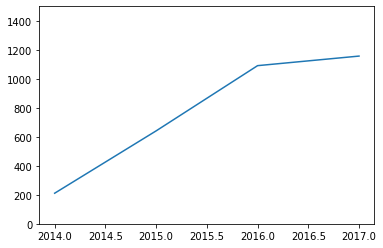

In [74]:
opioid_deaths_pre2018.year.value_counts().sort_index().plot(ylim=(0, 1500))

## Plot the number of fentanyl deaths by year, and the number of heroin deaths by year

- *Tip: You'll want to look up how to use `ylim` - it will let you set each graphic to use the same scale. This should be separate graphics.*
- *Tip: Pay attention to the numbers on your axes. `sort_index()` will be your friend.*
- *Tip: You should probably get rid of 2018*

<AxesSubplot:>

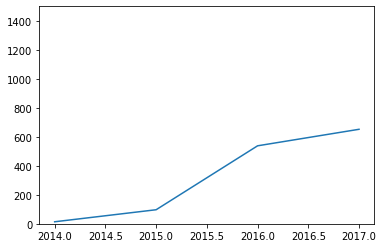

In [75]:
df[(df['Primary Cause'].str.contains("FENTANYL", na=False)) & (df.year != 2018)].year.value_counts().plot(ylim=(0, 1500))

<AxesSubplot:>

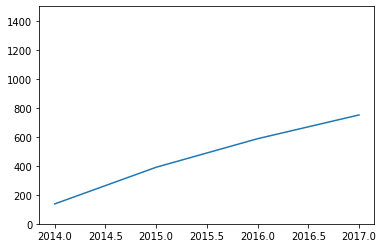

In [76]:
df[(df['Primary Cause'].str.contains("HEROIN", na=False)) & (df.year != 2018)].year.value_counts().plot(ylim=(0, 1500))

## How does this compare to gun deaths?

<AxesSubplot:>

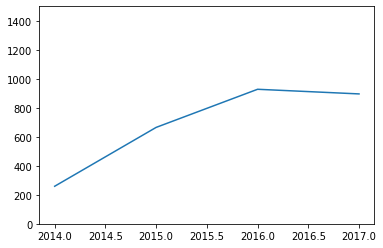

In [77]:
df[(df['Gun Related'] == True) & (df.year != 2018)].year.value_counts().sort_index().plot(ylim=(0, 1500))

## But hey: numbers can lie pretty easily!

The numbers are just so low in 2014 and much higher in 2017. What's going on there?

Well, maybe **there just isn't as much data from the earlier years**. Plot how many entries there are for each year.

<AxesSubplot:>

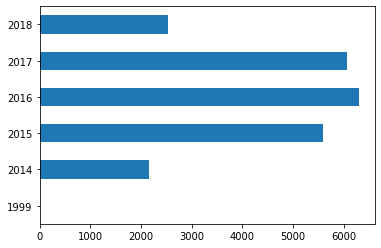

In [78]:
df.year.value_counts().sort_index().plot(kind='barh')

And we don't know the best way to fix that up yet, so instead I'm going to give you a present.

# Is the true lesson here, don't move to Cook County, Illinois?

Cook County is basically Chicago. It's probably just certain areas that are trouble, right? Let's investigate that without even having a clue how mapping works.

## Fun bonus: Making cheating maps

### Make a new dataframe of every death in the actual city of Chicago

In [79]:
df[df['Incident City'] == "CHICAGO"]

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location,year
1,ME2018-02149,05/05/2018 06:30:00 AM,05/05/2018 06:41:00 AM,65.0,Male,White,False,NaN,NaN,NaN,NaN,NaN,False,False,2110 W. 21ST PL #1,CHICAGO,-87.678845,41.853279,77827,"(41.8532787, -87.6788449)",2018
3,ME2018-02156,05/05/2018 12:00:00 PM,05/05/2018 12:25:00 PM,64.0,Female,White,False,NaN,NaN,NaN,NaN,NaN,False,False,"4008 W. BERTEAU AVENUE, APT #1",CHICAGO,-87.728177,41.957468,77823,"(41.9574677, -87.7281769)",2018
4,ME2018-02158,05/05/2018 09:30:00 AM,05/05/2018 09:50:00 AM,61.0,Male,Black,False,NaN,NaN,NaN,NaN,NaN,False,False,3947 W. LEXINGTON STREET,CHICAGO,-87.724739,41.871451,77822,"(41.8714515, -87.7247386)",2018
6,ME2017-00971,02/25/2017 07:48:00 AM,02/25/2017 09:20:00 AM,55.0,Male,White,False,UNDETERMINED,GUNSHOT WOUND TO HEAD,NaN,NaN,NaN,True,False,209 E. LAKE SHORE DRIVE,CHICAGO,-87.621421,41.900571,77930,"(41.900571, -87.6214206)",2017
7,ME2018-02147,05/04/2018 10:04:00 PM,05/04/2018 10:25:00 PM,47.0,Male,Black,False,PENDING,PENDING,NaN,NaN,NaN,False,False,1905 S. SPAULDING #1,CHICAGO,-87.707465,41.855148,78042,"(41.855148, -87.707465)",2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22620,ME2018-02116,04/21/2018 10:00:00 PM,05/03/2018 12:15:00 PM,88.0,Male,Black,False,NaN,NaN,NaN,NaN,NaN,False,False,7140 S. MARSHFIELD AVENUE,CHICAGO,-87.665268,41.763703,59566,"(41.7637034, -87.6652684)",2018
22625,ME2018-02102,05/02/2018 12:10:00 PM,05/02/2018 12:19:00 PM,73.0,Male,White,False,NATURAL,CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,"549 W. ALDINE AVENUE, UNIT #203",CHICAGO,-87.643876,41.941953,77939,"(41.9419529, -87.6438762)",2018
22627,ME2018-02120,05/03/2018 11:00:00 AM,05/03/2018 12:18:00 PM,32.0,Female,Black,False,PENDING,PENDING,NaN,NaN,NaN,False,False,9158 S. HARVARD AVENUE,CHICAGO,-87.632148,41.727769,77985,"(41.7277694, -87.6321484)",2018
22628,ME2018-02123,05/03/2018 01:15:00 PM,05/03/2018 01:51:00 PM,42.0,Male,Black,False,HOMICIDE,GUNSHOT WOUND OF RIGHT BUTTOCK,NaN,NaN,NaN,True,False,8159 SOUTH CORNELL AVENUE,CHICAGO,-87.583910,41.746488,78103,"(41.7464877, -87.5839097)",2018


### Confirm this new dataframe has 13,627 rows

In [80]:
#Shows 13,704. I don't know why.

### Use lat and long in the worst way possible to make a map

Use `longitude` and `latitude` and `plot` to make a rough map of the city. Chicago [looks like this](https://en.wikipedia.org/wiki/File:DuPage_County_Illinois_Incorporated_and_Unincorporated_areas_Chicago_Highlighted.svg)

- *Tip: Use the `latitude` and `longitude` columns*
- *Tip: You don't want a line graph, of course. Or a bar. What kind is the kind with dots on it?*
- *Tip: Use something like like `figsize=(10,5)` to specify the height and width of the map (but, you know, with better numbers that make it look like chicago)*

<AxesSubplot:xlabel='[longitude]', ylabel='[latitude]'>

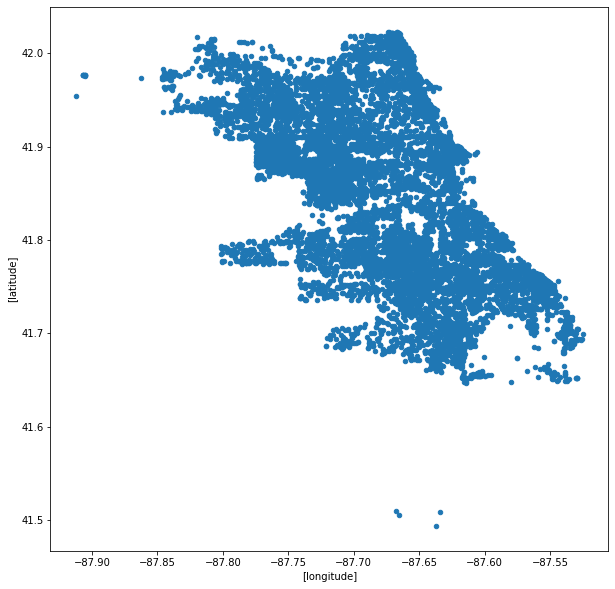

In [81]:
df[df['Incident City'] == "CHICAGO"].plot(x=['longitude'], y=['latitude'], figsize=(10,10), kind='scatter')

## Now let's find out where to live

Make a map of every non-homicide death in Chicago, then plot the homicides on top of it.

Use the `ax=df.plot` trick from the beer cans assignment to plot all of the rows representing homicides vs non-homicides. You can use `color='red'` to make one of them red, and `alpha=0.05` to make each mark very transparent to allow them to layer on top of each other.

<AxesSubplot:xlabel='[longitude]', ylabel='[latitude]'>

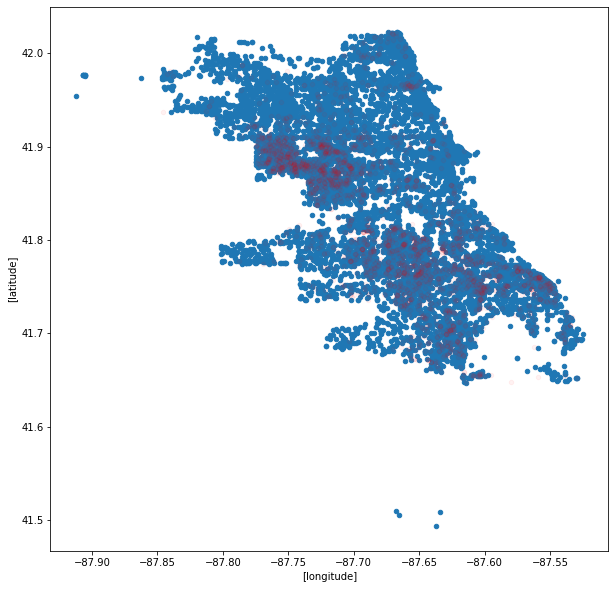

In [83]:
chicago_homicide = df[(df['Incident City'] == "CHICAGO") & (df['Manner of Death'] == "HOMICIDE")]
chicago_nonhomicide = df[(df['Incident City'] == "CHICAGO") & (df['Manner of Death'] != "HOMICIDE")]
%matplotlib inline
ax = chicago_nonhomicide.plot(x=['longitude'], y=['latitude'], figsize=(10,10), kind='scatter')
chicago_homicide.plot(ax=ax, x=['longitude'], y=['latitude'], figsize=(10,10), kind='scatter', color='red', alpha=0.05)

## Never tell anyone I let you do that.

But you want to see something actually completely legitimately insane?

**Chicago is one of the most segregated cities in America.** If you'd like to see this for yourself, make a map of `Race`. Plot black vs white in a way similar to what we did above.

<AxesSubplot:xlabel='[longitude]', ylabel='[latitude]'>

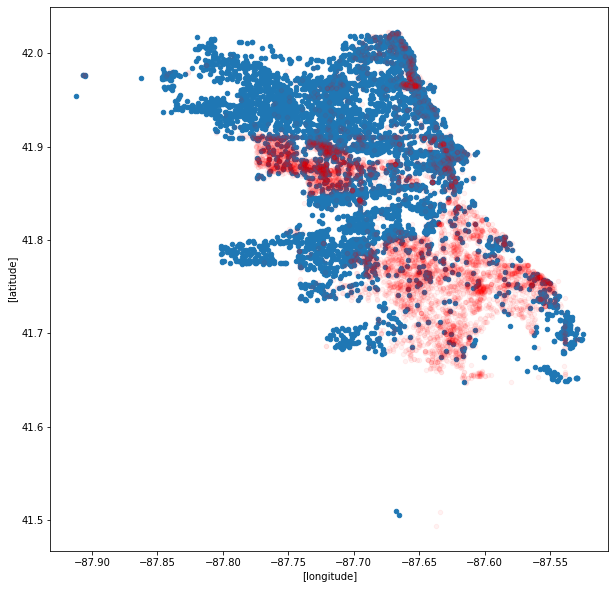

In [85]:
chicago_white = df[(df['Incident City'] == "CHICAGO") & (df['Race'] == "White")]
chicago_black = df[(df['Incident City'] == "CHICAGO") & (df['Race'] == "Black")]
%matplotlib inline
ax = chicago_white.plot(x=['longitude'], y=['latitude'], figsize=(10,10), kind='scatter')
chicago_black.plot(ax=ax, x=['longitude'], y=['latitude'], figsize=(10,10), kind='scatter', color='red', alpha=0.05)

Yup.